<a href="https://colab.research.google.com/github/canxiu-zhang/ML_YUniv/blob/main/ml_1010/group_projects/milestone_3/Milestone_3_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 3

## 1. EDA

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install contractions
!pip install unicodedata
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import contractions
import unicodedata
import pprint
%pprint

Pretty printing has been turned OFF


In [ ]:
df = pd.read_csv('tmdb_movies_data.csv')

### Parse top 5 genres in a column into a binary vector

In [ ]:
# Identify the column that contains the multiple genre labels
genre_column = 'genres'

# Create a list of all possible genre labels in your dataset
all_genres = ['Action', 'Comedy', 'Drama', 'Thriller', 'Romance']

# Use get_dummies() to convert the genre column into binary columns
genre_dummies = df[genre_column].str.get_dummies(sep='|').reindex(columns=all_genres, fill_value=1)

# Merge the new DataFrame with the original DataFrame
merged_df = pd.concat([df, genre_dummies], axis=1)

# Drop columns from the DataFrame
merged_df.drop(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'runtime', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

# Print the new DataFrame
print(merged_df.head())

       id                                           overview  \
0  135397  Twenty-two years after the events of Jurassic ...   
1   76341  An apocalyptic story set in the furthest reach...   
2  262500  Beatrice Prior must confront her inner demons ...   
3  140607  Thirty years after defeating the Galactic Empi...   
4  168259  Deckard Shaw seeks revenge against Dominic Tor...   

                                      genres  Action  Comedy  Drama  Thriller  \
0  Action|Adventure|Science Fiction|Thriller       1       0      0         1   
1  Action|Adventure|Science Fiction|Thriller       1       0      0         1   
2         Adventure|Science Fiction|Thriller       0       0      0         1   
3   Action|Adventure|Science Fiction|Fantasy       1       0      0         0   
4                      Action|Crime|Thriller       1       0      0         1   

   Romance  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
missing_values_check = merged_df.isnull().sum()
print(missing_values_check)

id           0
overview     4
genres      23
Action       0
Comedy       0
Drama        0
Thriller     0
Romance      0
dtype: int64


In [ ]:
categories = list(merged_df.columns.values)
categories = categories[3:]
print(categories)

['Action', 'Comedy', 'Drama', 'Thriller', 'Romance']


In [ ]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, merged_df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of overviews'])
df_stats

,category,number of overviews
0,Action,2385
1,Comedy,3793
2,Drama,4761
3,Thriller,2908
4,Romance,1712


## 2. Data Pre-Processing

In [ ]:
data = merged_df
data.shape

(10866, 8)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Cleaning Data

In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeSpecial(sentence):
    # Remove special characters using regular expression
    clean_text = re.sub(r'[^\w\s]', '', sentence)
    return clean_text

def removeAccent(sentence):
    # Remove accent characters using the unicodedata module
    no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', sentence) if unicodedata.category(char) != 'Mn')
    return no_accent_text

def removeContraction(sentence):
    # Expand contractions using contractions library
    expanded_text = contractions.fix(sentence)
    return expanded_text

In [ ]:
data['overview'] = data['overview'].str.lower()
data['overview'] = data['overview'].apply(cleanHtml)
data['overview'] = data['overview'].apply(cleanPunc)
data['overview'] = data['overview'].apply(keepAlpha)
data['overview'] = data['overview'].apply(removeSpecial)
data['overview'] = data['overview'].apply(removeAccent)
data['overview'] = data['overview'].apply(removeContraction)
data.head()

,id,overview,genres,Action,Comedy,Drama,Thriller,Romance
0,135397,twenty two years after the events of jurassic ...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
1,76341,an apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
2,262500,beatrice prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,0,0,0,1,0
3,140607,thirty years after defeating the galactic empi...,Action|Adventure|Science Fiction|Fantasy,1,0,0,0,0
4,168259,deckard shaw seeks revenge against dominic tor...,Action|Crime|Thriller,1,0,0,1,0


### Removing Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['overview'] = data['overview'].apply(removeStopWords)
data.head()

,id,overview,genres,Action,Comedy,Drama,Thriller,Romance
0,135397,twenty years events jurassic park isla nub...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
1,76341,apocalyptic story set furthest reaches pl...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
2,262500,beatrice prior must confront inner demons co...,Adventure|Science Fiction|Thriller,0,0,0,1,0
3,140607,thirty years defeating galactic empire han s...,Action|Adventure|Science Fiction|Fantasy,1,0,0,0,0
4,168259,deckard shaw seeks revenge dominic toretto ...,Action|Crime|Thriller,1,0,0,1,0


### Stemming

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

# data['overview'] = data['overview'].apply(stemming)
data.head()

,id,overview,genres,Action,Comedy,Drama,Thriller,Romance
0,135397,twenty years events jurassic park isla nub...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
1,76341,apocalyptic story set furthest reaches pl...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
2,262500,beatrice prior must confront inner demons co...,Adventure|Science Fiction|Thriller,0,0,0,1,0
3,140607,thirty years defeating galactic empire han s...,Action|Adventure|Science Fiction|Fantasy,1,0,0,0,0
4,168259,deckard shaw seeks revenge dominic toretto ...,Action|Crime|Thriller,1,0,0,1,0


### Lemmatization

In [ ]:
nlp = spacy.load('en_core_web_sm')
def lemmatization(sentence):
  doc = nlp(sentence)
  lemmas = [token.lemma_ for token in doc]
  lemmas = [l.strip() for l in lemmas]
  return " ".join(lemmas)

data['overview'] = data['overview'].apply(lemmatization)
data.head()

,id,overview,genres,Action,Comedy,Drama,Thriller,Romance
0,135397,twenty year event jurassic park isla nublar...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
1,76341,apocalyptic story set furth reach planet s...,Action|Adventure|Science Fiction|Thriller,1,0,0,1,0
2,262500,beatrice prior must confront inner demon con...,Adventure|Science Fiction|Thriller,0,0,0,1,0
3,140607,thirty year defeat galactic empire han solo ...,Action|Adventure|Science Fiction|Fantasy,1,0,0,0,0
4,168259,deckard shaw seek revenge dominic toretto fa...,Action|Crime|Thriller,1,0,0,1,0


### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(7606, 8)
(3260, 8)


In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [ ]:
train_new = pd.read_csv('train.csv')
test_new = pd.read_csv('test.csv')

In [ ]:
train_text = train['overview']
test_text = test['overview']

In [ ]:
train.head()

,id,overview,genres,Action,Comedy,Drama,Thriller,Romance
4792,84334,south africans set discover happen unlikel...,Documentary|Music,0,0,0,0,0
9906,24229,surprise contract victim try run away prof...,Crime|Drama|Mystery,0,0,1,0,0
5061,10943,cassie grant christina ricci young girl unit...,Horror|Thriller,0,0,0,1,0
9354,13888,sequel classic child strand beautiful isl...,Drama|Adventure|Romance,0,0,1,0,1
4696,103370,wall street investment banker set linchpin ...,Drama|Comedy|Crime,0,1,1,0,0


In [ ]:
test.head()

,id,overview,genres,Action,Comedy,Drama,Thriller,Romance
8468,11674,live action adaptation disney classic litte...,Comedy|Family,0,1,0,0,0
1511,26505,arthur answer distress call princess selenia...,Adventure|Fantasy|Animation|Family,0,0,0,0,0
2638,644,year old david first android human feeling ...,Drama|Science Fiction|Adventure,0,0,1,0,0
8260,12143,investigate young nun rape corrupt new york...,Crime|Drama,0,0,1,0,0
1713,37565,girl st trinians hunt bury treasure disco...,Comedy|Adventure,0,1,0,0,0


### Resample Training dataset

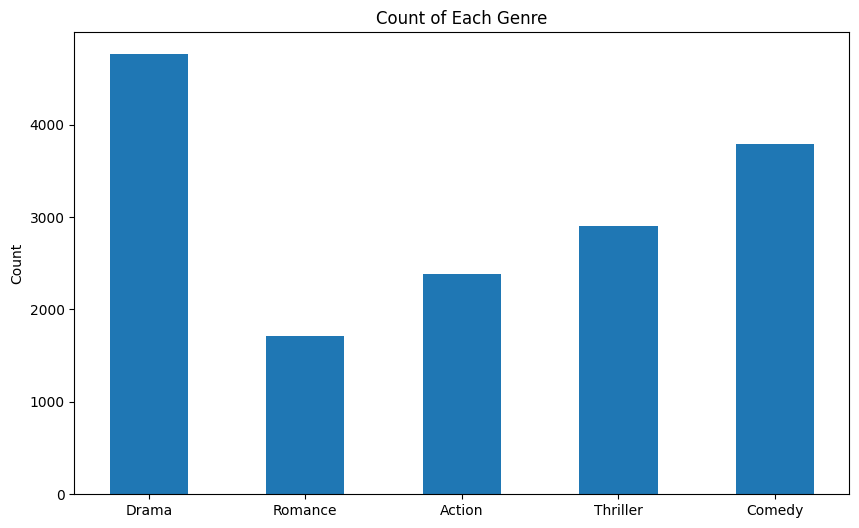

In [ ]:
#Plotting the y genre columns:

genre_columns = ['Drama', 'Romance', 'Action', 'Thriller', 'Comedy']
plot_df = data[genre_columns]

# Calculate the sum of each column
column_sums = plot_df.sum(axis=0)

# Set the width of the bars
bar_width = 0.5

# Set the x-axis positions for the bars
x = np.arange(len(column_sums))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each column
ax.bar(x, column_sums, width=bar_width)

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(column_sums.index)

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Count of Each Genre')

# Show the plot
plt.show()


## 3. Feature Extraction

### GloVe model

In [ ]:
# feature engineering with GloVe model
train_nlp = [nlp(item) for item in train_text]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [nlp(item) for item in test_text]
test_glove_features = np.array([item.vector for item in test_nlp])

In [ ]:
# print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

GloVe model:> Train features shape: (7606, 96)  Test features shape: (3260, 96)


### word2vec model

In [ ]:
import spacy
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
import multiprocessing
from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                    #  size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
from gensim.models.phrases import Phrases, Phraser
from nltk import bigrams

words = [row.split() for row in train['overview']]
phrases = Phrases(words, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[words]

In [ ]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(2072588, 6735480)

In [ ]:
w2v_model.init_sims(replace=True)

<ipython-input-33-c7757d71a30b>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [ ]:
w2v_model.wv.most_similar(positive=["life"])

[('never', 0.9704604148864746), ('change', 0.9671638607978821), ('true', 0.9651128649711609), ('live', 0.9611201286315918), ('friendship', 0.958516538143158), ('grow', 0.9569889903068542), ('lesson', 0.9564611911773682), ('always', 0.9554188251495361), ('see', 0.9542274475097656), ('come', 0.9537985920906067)]

In [ ]:
w2v_model.wv.most_similar(positive=["find"])

[('soon', 0.9833688735961914), ('discover', 0.9747644662857056), ('someone', 0.9726901650428772), ('clear', 0.9663558602333069), ('choose', 0.9656525254249573), ('anyone', 0.9639893174171448), ('he', 0.9638491272926331), ('another', 0.9631983041763306), ('keep', 0.9631534218788147), ('victim', 0.9628207087516785)]

In [ ]:
w2v_model.wv.most_similar(positive=["she"])

[('intention', 0.9908525943756104), ('wait', 0.9908128380775452), ('unable', 0.9907503724098206), ('accept', 0.9906343221664429), ('eventually', 0.9902847409248352), ('hope', 0.9899826645851135), ('he', 0.9899664521217346), ('beat', 0.9895474910736084), ('nurse', 0.9894807934761047), ('desperate', 0.9893428683280945)]

In [ ]:
tokenizer = ToktokTokenizer()
nlp = spacy.load('en_core_web_sm')

In [ ]:
# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text)
                   for text in train_text]
y_train = train.drop(labels = ['id','overview', 'genres'], axis=1)
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in test_text]
y_test = test.drop(labels = ['id','overview', 'genres'], axis=1)

In [ ]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)    

In [ ]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model, num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model, num_features=500)

In [ ]:
train['overview'][5734]

' romantic fantasy movie  people  last survivor  ancient line  goddess worshiper  sell art  shop  teenage daughter rhea fall  love  poetically inclined boy  begin  develop magical power  throw everything  chaos'

In [ ]:
avg_wv_train_features[4]

array([ 0.1631367 ,  0.17544467,  0.10610074,  0.05822371, -0.1309604 ,
       -0.22735108,  0.05087879,  0.35968638,  0.14071566, -0.01017639,
       -0.06274186,  0.11184666,  0.10066012,  0.03758968,  0.10397632,
       -0.21410115, -0.15504278, -0.11322122,  0.01229455,  0.03995619,
        0.03861674, -0.08179644,  0.14419603, -0.10152371,  0.14928928,
        0.11509847,  0.07867221, -0.0117875 , -0.30478126,  0.0031499 ,
        0.12453074,  0.02177435, -0.04429952, -0.01704655,  0.09236794,
        0.11743491, -0.02623092, -0.04554341, -0.07498716, -0.20557428,
       -0.07016066,  0.04115171, -0.13586639,  0.04942392, -0.14506116,
       -0.17316689, -0.11554133,  0.06462013, -0.01833961, -0.01538936,
       -0.01542093, -0.03735852,  0.02042101, -0.26056748,  0.09758909,
       -0.11507988,  0.07145487,  0.00195995, -0.01215324,  0.08635604,
        0.06193522, -0.01036515, -0.02480944,  0.04729342, -0.08523176,
        0.11104851, -0.07622076,  0.06622695,  0.08679619,  0.01

### t-SNE visualizations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['green']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    # for wrd_score in close_words[:5]:
    #     wrd_vector = model.wv.__getitem__([wrd_score[0]])
    #     word_labels.append(wrd_score[0])
    #     color_list.append('blue')
    #     arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=4).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=3).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-30, Y[:, 0].max()+30)
    plt.ylim(Y[:, 1].min()-30, Y[:, 1].max()+30)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

#### 10 Most similar words vs. 8 Random words

In [ ]:
tsnescatterplot(w2v_model, 'romantic', ['fantasy', 'people', 'survivor', 'chaos', 'teenage'])

ValueError: ignored

In [ ]:
tsnescatterplot(w2v_model, 'fun', ['dog', 'paris', 'home', 'power', 'water', 'cat', 'ill', 'work'])

#### Plot w2v model

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = ['dog', 'paris', 'home', 'power', 'water', 'cat', 'ill', 'work']
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    i = -1
    for word in model.wv.key_to_index:
        i+=1
        if i%30==0:
          tokens.append(model.wv[word])
          labels.append(word)
    
    tsne_model = TSNE(n_components=2, n_iter=2500, random_state=23)
    tokens_array = np.array(tokens)  # convert list to numpy array
    new_values = tsne_model.fit_transform(tokens_array)

    x = new_values[:,0]
    y = new_values[:,1]
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(w2v_model)

### show word vector

In [ ]:
w2v_model.wv.vectors.shape

In [ ]:
w2v_model.wv.vectors

In [ ]:
w2v_model.wv.key_to_index

### TF-IDF

Creating Trigrams Using bigrams as inputs in order to provide more contextual meaning vs creating trigrams from scratch. This means that we can consider the relationship between words already captured in the bigrams to provide better overall context. 

In [ ]:
from gensim.models.phrases import Phrases, Phraser
from nltk import bigrams, trigrams

words = [row.split() for row in train['overview']]

# First create bigrams
bigram_phrases = Phrases(words, min_count=30, progress_per=10000)
bigram = Phraser(bigram_phrases)
bigram_sentences = bigram[words]



In [ ]:
# Next create trigrams using the bigrams as inputs
trigram_phrases = Phrases(bigram_sentences, min_count=30, progress_per=10000)
trigram = Phraser(trigram_phrases)
trigram_sentences = trigram[bigram_sentences]

Visualizing the 20 most common trigrams:


In [ ]:
from collections import Counter
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

# Use 'words' as a list of tokenized sentences
flat_words = [word for sentence in words for word in sentence]

# Find trigram collocations
trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(flat_words)

finder.apply_freq_filter(10)  # Only consider trigrams that appear at least 10 times

# Get the top 20 trigrams by using Pointwise Mutual Information:
top_trigrams = finder.nbest(trigram_measures.pmi, 20)

# Plot of common trigrams:
trigram_counts = Counter(finder.ngram_fd)
trigram_freqs = [trigram_counts[trigram] for trigram in top_trigrams]

plt.figure(figsize=(20, 8))
plt.bar(['_'.join(trigram) for trigram in top_trigrams], trigram_freqs)
plt.xticks(rotation=45)
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Trigrams')
plt.show()



The trigram new_york_city can likely be dropped given it's frequency relative to the other trigrams. Let's instead TFIDF vectorize our trigrams to look at ways to weight trigrams such as 'new_york_city' with less importance:

In [ ]:
from nltk import trigrams
from sklearn.feature_extraction.text import TfidfVectorizer

def trigram_tokenizer(text):
    words = text.split()
    trigram_list = ['_'.join(trigram) for trigram in trigrams(words)]
    return trigram_list

text_data = train['overview']

vectorizer = TfidfVectorizer(tokenizer=trigram_tokenizer, ngram_range=(1, 1), min_df=3)
X = vectorizer.fit_transform(text_data)

# X is the TF-IDF feature matrix

In [ ]:
X.shape

In [ ]:
type(X)

Showing a dataframe of TFIDF trigram summations across the corpus of documents:






In [ ]:
import numpy as np
import pandas as pd

# Sum the TF-IDF values for each trigram across all documents
trigram_sums = np.sum(X, axis=0)
trigram_sums = np.squeeze(np.asarray(trigram_sums))

# Create a DataFrame with trigrams and their corresponding summed TF-IDF values
trigram_scores = pd.DataFrame({"trigram": vectorizer.get_feature_names_out(), "tfidf_sum": trigram_sums})

# Sort the DataFrame based on the summed TF-IDF values in descending order
trigram_scores = trigram_scores.sort_values(by="tfidf_sum", ascending=False)

# Display the top 20 trigrams along with their summed TF-IDF scores
top_20_trigrams = trigram_scores.head(20)
print(top_20_trigrams)


It seems using TFIDF trigram sum accross all documents (shown in the code block above) replicates the most frequently occuring trigrams across the corpus as seen in the 20 most common trigrams plot (also above). Instead, let's try using max TFIDF score to see if this is a more useful measure of trigram importance. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def trigram_tokenizer(text):
    words = text.split()
    trigram_list = ['_'.join(trigram) for trigram in trigrams(words)]
    return trigram_list

text_data = train['overview']

vectorizer = TfidfVectorizer(tokenizer=trigram_tokenizer, ngram_range=(1, 1))
X = vectorizer.fit_transform(text_data)

# Calculate the maximum TF-IDF value for each trigram across all documents
trigram_max = np.max(X, axis=0).toarray().ravel()

# Create a DataFrame with trigrams and their corresponding maximum TF-IDF values
trigram_scores = pd.DataFrame({"trigram": vectorizer.get_feature_names_out(), "tfidf_max": trigram_max})

# Sort the DataFrame based on the maximum TF-IDF values in descending order
trigram_scores = trigram_scores.sort_values(by="tfidf_max", ascending=False)

# Display the top 20 trigrams along with their maximum TF-IDF scores
top_20_trigrams = trigram_scores.head(20)
print(top_20_trigrams)


Below, showing a dataframe of the lowest of the TFIDF maximum scores:  

In [ ]:

#Sort the DataFrame based on the maximum TF-IDF values in ascending order
#This shows us the lowest maximum scores
trigram_scores = trigram_scores.sort_values(by="tfidf_max", ascending=True)

# Display the bottom 20 trigrams along with their maximum TF-IDF scores
bottom_20_trigrams = trigram_scores.head(20)
print(bottom_20_trigrams)

In [ ]:
#Create the TFIDF Matrix for the test dataset as well:
test_text_data = test['overview']
X_test = vectorizer.transform(test_text_data)

In [ ]:
X_test.shape

In [ ]:
X.shape

### doc2vector

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

In [ ]:
from gensim.models.phrases import Phrases, Phraser
from nltk import bigrams

words = [row.split() for row in train['overview']]
phrases = Phrases(words, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[words]

In [ ]:
sentences

In [ ]:
def get_documents(overviews):
    texts = []
    for row in overviews:
        word_array = row.split(" ")
        texts.append([x for x in word_array if x])
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts)]
    return texts, documents

In [ ]:
train_texts, train_documents = get_documents(train['overview'])

In [ ]:
model = Doc2Vec(train_documents, vector_size=100, dm=1, dm_concat=1, window=2, min_count=1, workers=4)

In [ ]:
d2v_train_vectors = [model.infer_vector(text) for text in train_texts] 
d2v_train_vectors = np.array(d2v_train_vectors)

In [ ]:
test_texts, test_documents = get_documents(test['overview'])
d2v_test_vectors = [model.infer_vector(text) for text in test_texts] 
d2v_test_vectors = np.array(d2v_test_vectors)

In [ ]:
d2v_train_vectors.shape

In [ ]:
d2v_test_vectors.shape

### doc2vec - ngrams

In [ ]:
from gensim.models.phrases import Phrases, Phraser
from nltk import bigrams

words = [row.split() for row in train['overview']]
phrases = Phrases(words, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[words]

w2v_model.build_vocab(sentences, progress_per=10000)

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

tokenizer = ToktokTokenizer()
nlp = spacy.load('en_core_web_sm')

# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text)
                   for text in train_text]
y_train = train.drop(labels = ['id','overview', 'genres'], axis=1)
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in test_text]
y_test = test.drop(labels = ['id','overview', 'genres'], axis=1)

# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)  

def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model, num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model, num_features=500)

# Baseline and Benchmark of Features

# Using pipeline for applying logistic regression and one vs rest classifier

OneVsRest
1. Traditional two-class and multi-class problems can both be cast into multi-label ones by restricting each instance to have only one label. On the other hand, the generality of multi-label problems inevitably makes it more difficult to learn. An intuitive approach to solving multi-label problem is to decompose it into multiple independent binary classification problems (one per category).
2. In an “one-to-rest” strategy, one could build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.
3. The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.
4. For instance, it is more like asking simple questions, say, “is the comment toxic or not”, “is the comment threatening or not?”, etc. Also there might be an extensive case of overfitting here, since most of the comments are unlabeled, i,e., most of the comments are clean comments.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

### word2vec

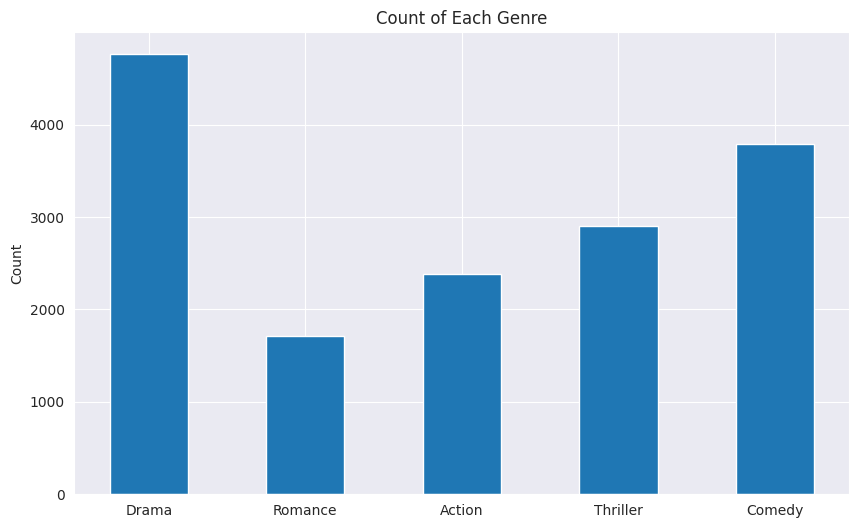

In [ ]:
#Plotting the y genre columns:

genre_columns = ['Drama', 'Romance', 'Action', 'Thriller', 'Comedy']
plot_df = data[genre_columns]

# Calculate the sum of each column
column_sums = plot_df.sum(axis=0)

# Set the width of the bars
bar_width = 0.5

# Set the x-axis positions for the bars
x = np.arange(len(column_sums))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each column
ax.bar(x, column_sums, width=bar_width)

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(column_sums.index)

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Count of Each Genre')

# Show the plot
plt.show()


In [ ]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train = avg_wv_train_features
y_train = train[categories]

print(X_train.shape)
print(y_train.shape)
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import SMOTE

lp = LabelPowerset()
y_train_single_label = lp.transform(y_train)
print(len(y_train_single_label))

count = {}
for i in y_train_single_label:
  count[i] = 0

for i in y_train_single_label:
  count[i] += 1

# Apply SMOTE to the transformed dataset
smote = SMOTE(random_state=42)
remove_index = []

y_new = []
for i in range(7606):
  power_label = y_train_single_label[i]
  if count[power_label] < 6:
    remove_index.append(i)
  else:
    y_new.append(y_train_single_label[i])

print(len(remove_index))
X_new = np.delete(X_train, remove_index, axis=0)

print(X_new.shape)
print(len(y_new))
X_train_resampled, y_train_single_label_resampled = smote.fit_resample(X_new, y_new)
y_train_resampled = lp.inverse_transform(y_train_single_label_resampled)
y_df = pd.DataFrame(y_train_resampled.toarray(), columns=categories)

(7606, 500)
(7606, 5)
7606
9
(7597, 500)
7597


In [ ]:
print(y_train_resampled.shape)
print(X_train_resampled.shape)

(32451, 5)
(32451, 500)


**Processing Action overview...**

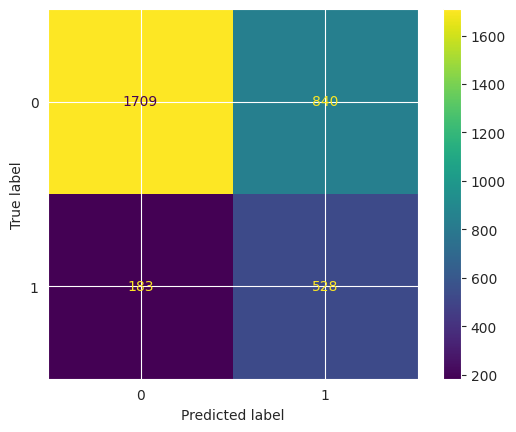

Test accuracy is 0.6861963190184049
Test f1 is 0.5079365079365079
Test precision score is 0.38596491228070173
Test recall score is 0.7426160337552743
Test roc auc score is 0.7065375186430355




**Processing Comedy overview...**

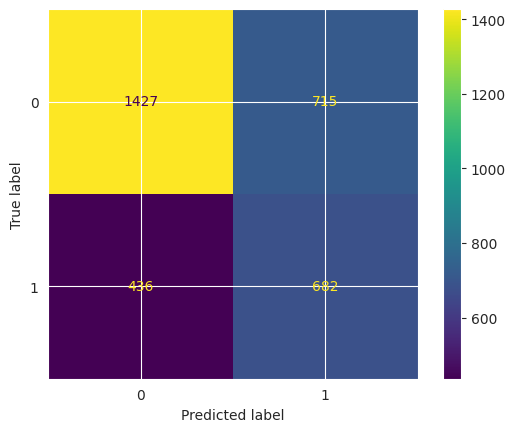

Test accuracy is 0.6469325153374234
Test f1 is 0.5423459244532803
Test precision score is 0.4881889763779528
Test recall score is 0.6100178890876565
Test roc auc score is 0.6381088511731468




**Processing Drama overview...**

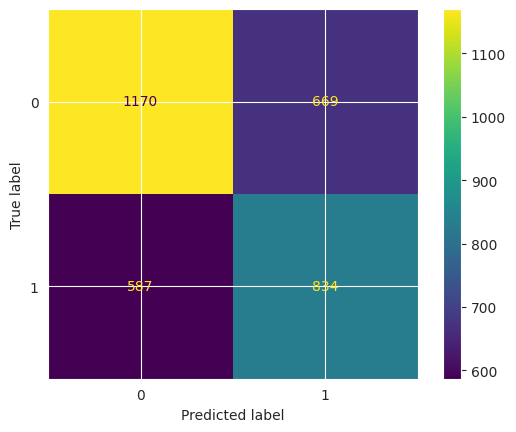

Test accuracy is 0.6147239263803681
Test f1 is 0.5704514363885089
Test precision score is 0.5548902195608783
Test recall score is 0.5869106263194933
Test roc auc score is 0.6115629803701871




**Processing Thriller overview...**

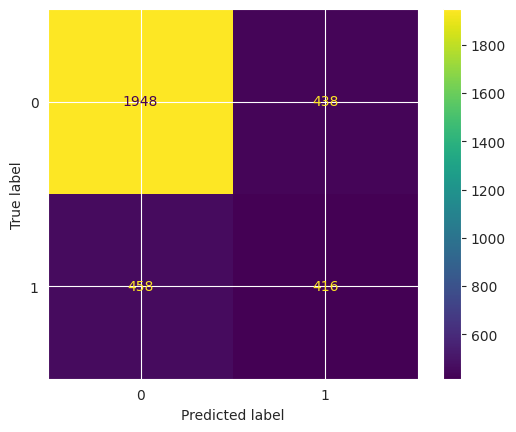

Test accuracy is 0.7251533742331289
Test f1 is 0.4814814814814815
Test precision score is 0.48711943793911006
Test recall score is 0.4759725400457666
Test roc auc score is 0.6462008551025145




**Processing Romance overview...**

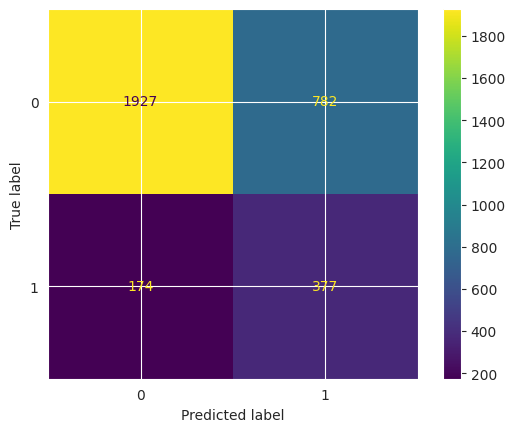

Test accuracy is 0.7067484662576687
Test f1 is 0.4409356725146199
Test precision score is 0.3252804141501294
Test recall score is 0.6842105263157895
Test roc auc score is 0.6977715606846574


CPU times: user 2.54 s, sys: 1.32 s, total: 3.86 s
Wall time: 55.2 s


In [ ]:
%%time

# from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

# dummy_pipeline = Pipeline([
#                 ('clf', OneVsRestClassifier(DummyClassifier(), n_jobs=-1)),
#             ])

for category in categories:
    printmd('**Processing {} overview...**'.format(category))
    
    # Training logistic regression model on train data
    model = LogReg_pipeline.fit(X_train_resampled, y_df[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(avg_wv_test_features)

    cm = confusion_matrix(test[category], prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print('Test f1 is {}'.format(f1_score(test[category], prediction)))
    print('Test precision score is {}'.format(precision_score(test[category], prediction)))
    print('Test recall score is {}'.format(recall_score(test[category], prediction)))
    print('Test roc auc score is {}'.format(roc_auc_score(test[category], prediction)))
    print("\n")

### GloVe

In [ ]:
X_train = train_glove_features
y_train = train[categories]

print(X_train.shape)
print(y_train.shape)
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import SMOTE

lp = LabelPowerset()
y_train_single_label = lp.transform(y_train)
print(len(y_train_single_label))

count = {}
for i in y_train_single_label:
  count[i] = 0

for i in y_train_single_label:
  count[i] += 1

# Apply SMOTE to the transformed dataset
smote = SMOTE(random_state=42)
remove_index = []

y_new = []
for i in range(7606):
  power_label = y_train_single_label[i]
  if count[power_label] < 6:
    remove_index.append(i)
  else:
    y_new.append(y_train_single_label[i])

print(len(remove_index))
X_new = np.delete(X_train, remove_index, axis=0)

print(X_new.shape)
print(len(y_new))
X_train_resampled, y_train_single_label_resampled = smote.fit_resample(X_new, y_new)
y_train_resampled = lp.inverse_transform(y_train_single_label_resampled)
y_df = pd.DataFrame(y_train_resampled.toarray(), columns=categories)

(7606, 96)
(7606, 5)
7606
9
(7597, 96)
7597


**Processing Action overview...**

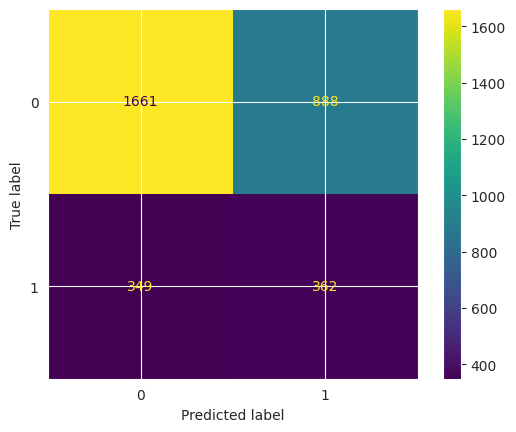

Test accuracy is 0.6205521472392638
Test f1 is 0.3691993880673127
Test precision score is 0.2896
Test recall score is 0.509142053445851
Test roc auc score is 0.5803850714463464




**Processing Comedy overview...**

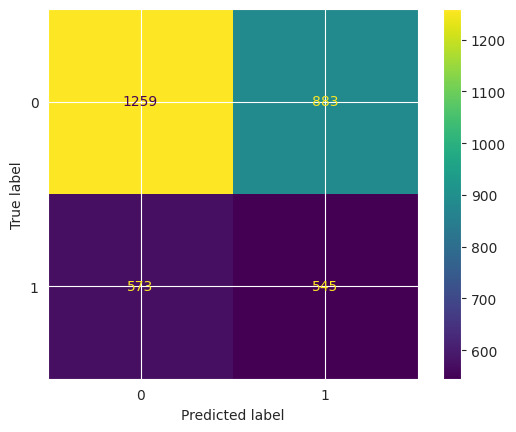

Test accuracy is 0.5533742331288344
Test f1 is 0.4281225451688923
Test precision score is 0.38165266106442575
Test recall score is 0.4874776386404293
Test roc auc score is 0.5376230396750232




**Processing Drama overview...**

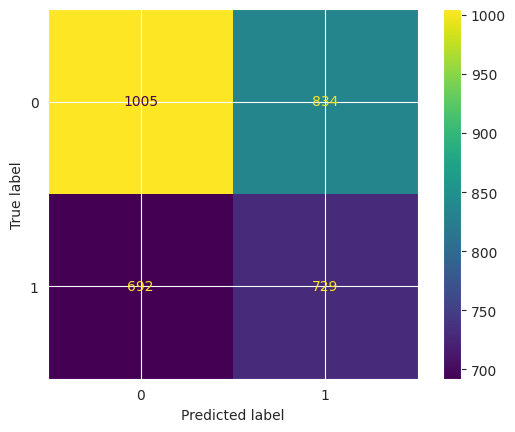

Test accuracy is 0.5319018404907976
Test f1 is 0.4886058981233244
Test precision score is 0.46641074856046066
Test recall score is 0.5130190007037297
Test roc auc score is 0.5297558298787817




**Processing Thriller overview...**

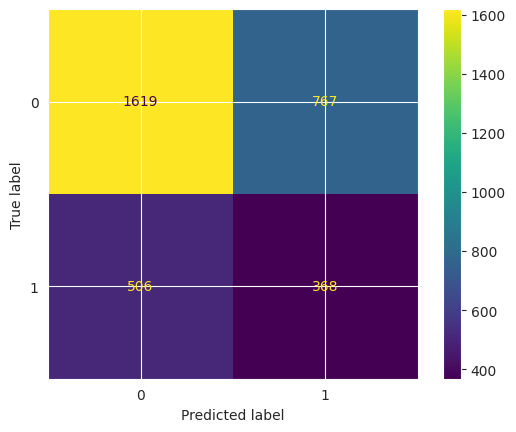

Test accuracy is 0.6095092024539878
Test f1 is 0.366351418616227
Test precision score is 0.32422907488986785
Test recall score is 0.42105263157894735
Test roc auc score is 0.5497970618079145




**Processing Romance overview...**

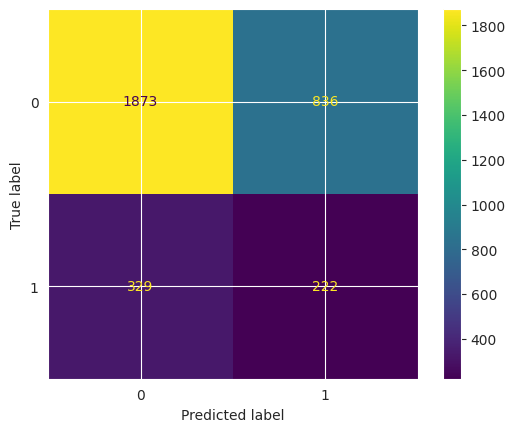

Test accuracy is 0.6426380368098159
Test f1 is 0.2759477936606588
Test precision score is 0.20982986767485823
Test recall score is 0.4029038112522686
Test roc auc score is 0.5471514257442591


CPU times: user 2.18 s, sys: 773 ms, total: 2.95 s
Wall time: 36.9 s


In [ ]:
%%time
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} overview...**'.format(category))
    
    # Training logistic regression model on train data
    model = LogReg_pipeline.fit(X_train_resampled, y_df[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(test_glove_features)
    cm = confusion_matrix(test[category], prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print('Test f1 is {}'.format(f1_score(test[category], prediction)))
    print('Test precision score is {}'.format(precision_score(test[category], prediction)))
    print('Test recall score is {}'.format(recall_score(test[category], prediction)))
    print('Test roc auc score is {}'.format(roc_auc_score(test[category], prediction)))
    print("\n")

### TD-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','overview', 'genres'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','overview', 'genres'], axis=1)

In [ ]:
x_train.shape

(7606, 185395)

In [ ]:
# type(X_test)
type(X)
# X.shape

NameError: ignored

In [ ]:
X_train = x_train
y_train = train[categories]

print(X_train.shape)
print(y_train.shape)
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import SMOTE

lp = LabelPowerset()
y_train_single_label = lp.transform(y_train)
print(len(y_train_single_label))

count = {}
for i in y_train_single_label:
  count[i] = 0

for i in y_train_single_label:
  count[i] += 1

# Apply SMOTE to the transformed dataset
smote = SMOTE(random_state=42)
remove_index = []

y_new = []
for i in range(7606):
  power_label = y_train_single_label[i]
  if count[power_label] < 6:
    remove_index.append(i)
  else:
    y_new.append(y_train_single_label[i])

print(len(remove_index))



(7606, 185395)
(7606, 5)
7606
9


In [ ]:
def delete_row_csr(mat, i):
    n = mat.indptr[i+1] - mat.indptr[i]
    if n > 0:
        mat.data[mat.indptr[i]:-n] = mat.data[mat.indptr[i+1]:]
        mat.data = mat.data[:-n]
        mat.indices[mat.indptr[i]:-n] = mat.indices[mat.indptr[i+1]:]
        mat.indices = mat.indices[:-n]
    mat.indptr[i:-1] = mat.indptr[i+1:]
    mat.indptr[i:] -= n
    mat.indptr = mat.indptr[:-1]
    mat._shape = (mat._shape[0]-1, mat._shape[1])

for i in remove_index:
    delete_row_csr(X_train, i)

print(X_train.shape)


(7597, 185395)


In [ ]:
print(len(y_new))
X_train_resampled, y_train_single_label_resampled = smote.fit_resample(X_train, y_new)
y_train_resampled = lp.inverse_transform(y_train_single_label_resampled)
y_df = pd.DataFrame(y_train_resampled.toarray(), columns=categories)

7597


**Processing Action overview...**

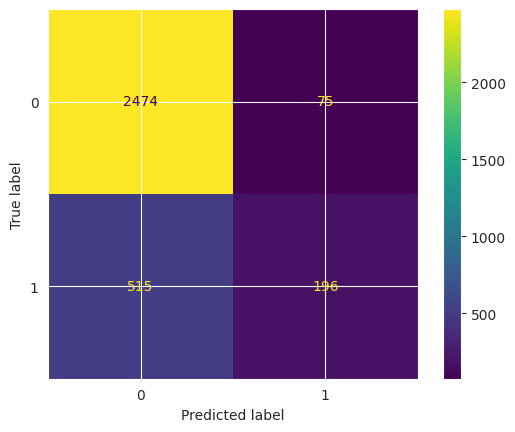

Test accuracy is 0.8190184049079755
Test f1 is 0.39918533604887985
Test precision score is 0.7232472324723247
Test recall score is 0.27566807313642755
Test roc auc score is 0.6231223849401243




**Processing Comedy overview...**

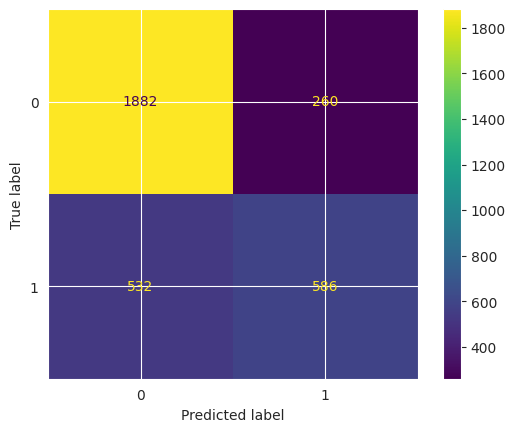

Test accuracy is 0.7570552147239263
Test f1 is 0.5967413441955193
Test precision score is 0.6926713947990544
Test recall score is 0.5241502683363148
Test roc auc score is 0.7013841911242732




**Processing Drama overview...**

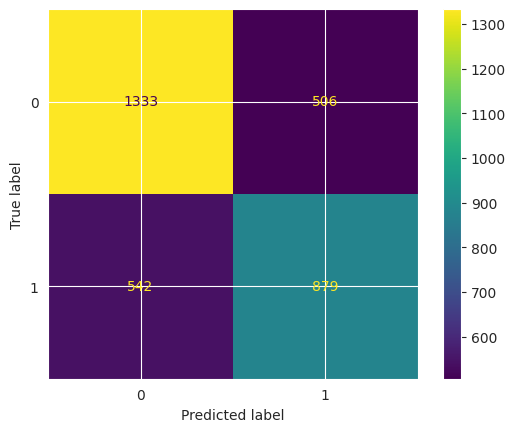

Test accuracy is 0.6785276073619632
Test f1 is 0.6265146115466856
Test precision score is 0.6346570397111914
Test recall score is 0.6185784658691063
Test roc auc score is 0.671714464038414




**Processing Thriller overview...**

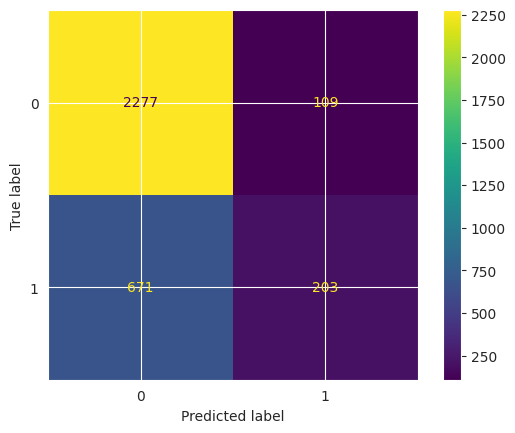

Test accuracy is 0.7607361963190185
Test f1 is 0.342327150084317
Test precision score is 0.6506410256410257
Test recall score is 0.2322654462242563
Test roc auc score is 0.5932911472529496




**Processing Romance overview...**

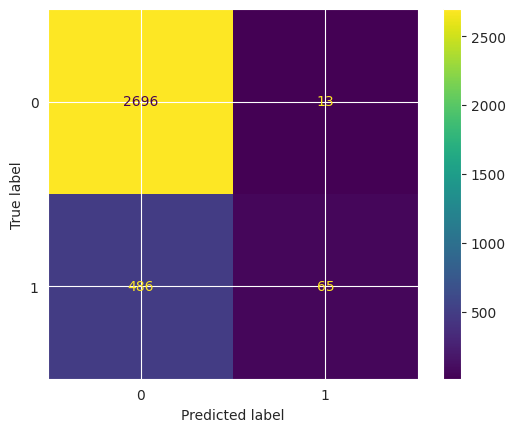

Test accuracy is 0.8469325153374233
Test f1 is 0.20667726550079493
Test precision score is 0.8333333333333334
Test recall score is 0.11796733212341198
Test roc auc score is 0.5565842566855524


CPU times: user 1.66 s, sys: 556 ms, total: 2.22 s
Wall time: 8.37 s


In [ ]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} overview...**'.format(category))
    
    # Training logistic regression model on train data
    model = LogReg_pipeline.fit(X_train_resampled, y_df[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    cm = confusion_matrix(test[category], prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print('Test f1 is {}'.format(f1_score(test[category], prediction)))
    print('Test precision score is {}'.format(precision_score(test[category], prediction)))
    print('Test recall score is {}'.format(recall_score(test[category], prediction)))
    print('Test roc auc score is {}'.format(roc_auc_score(test[category], prediction)))
    print("\n")

### doc2vec

In [ ]:
X_train = d2v_train_vectors
y_train = train[categories]

print(X_train.shape)
print(y_train.shape)
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import SMOTE

lp = LabelPowerset()
y_train_single_label = lp.transform(y_train)
print(len(y_train_single_label))

count = {}
for i in y_train_single_label:
  count[i] = 0

for i in y_train_single_label:
  count[i] += 1

# Apply SMOTE to the transformed dataset
smote = SMOTE(random_state=42)
remove_index = []

y_new = []
for i in range(7606):
  power_label = y_train_single_label[i]
  if count[power_label] < 6:
    remove_index.append(i)
  else:
    y_new.append(y_train_single_label[i])

print(len(remove_index))
X_new = np.delete(X_train, remove_index, axis=0)

print(X_new.shape)
print(len(y_new))
X_train_resampled, y_train_single_label_resampled = smote.fit_resample(X_new, y_new)
y_train_resampled = lp.inverse_transform(y_train_single_label_resampled)
y_df = pd.DataFrame(y_train_resampled.toarray(), columns=categories)

NameError: ignored

In [ ]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} overview...**'.format(category))
    
    # Training logistic regression model on train data
    model = LogReg_pipeline.fit(X_train_resampled, y_df[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(d2v_test_vectors)
    cm = confusion_matrix(test[category], prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print('Test f1 is {}'.format(f1_score(test[category], prediction)))
    print('Test precision score is {}'.format(precision_score(test[category], prediction)))
    print('Test recall score is {}'.format(recall_score(test[category], prediction)))
    print('Test roc auc score is {}'.format(roc_auc_score(test[category], prediction)))
    print("\n")

**Processing Action overview...**

NameError: ignored

# 4. Classifiers

In [ ]:
from sklearn.metrics import accuracy_score

x_train = avg_wv_train_features
x_test = avg_wv_test_features
y_train = train[categories]
y_test = test[categories]

## Label Powerset - before resample

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy =  0.2085889570552147




In [ ]:
predictions.toarray()

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]])

## Label Powerset - After resample

In [ ]:
x_train = X_train_resampled
y_train = y_train_resampled

# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

KeyboardInterrupt: ignored

## Classifier Chains - before resample

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

## Classifier Chains - after resample

In [ ]:
x_train = X_train_resampled
y_train = y_train_resampled

from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

## Binary Relevance - before resample

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

## Binary Relevance - After resample

In [ ]:
x_train = X_train_resampled
y_train = y_train_resampled

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

## Adapted Algorithm

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")